In [1]:
%matplotlib inline

import os
import json
from datetime import datetime, timedelta
from collections import defaultdict

import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

In [2]:
events = map(lambda line: json.loads(line), open('eventstore.json', 'rt'))
events = filter(lambda event: event['class'] == 'ActivityUpdateEvent', events)
events = list(events)
for event in events:
    event.update({'datetime': datetime.fromtimestamp(event['timestamp'] / 1000)})
    
min_datetime = datetime.now() - timedelta(hours=12)
events = list(filter(lambda event: min_datetime <= event['datetime'], events))

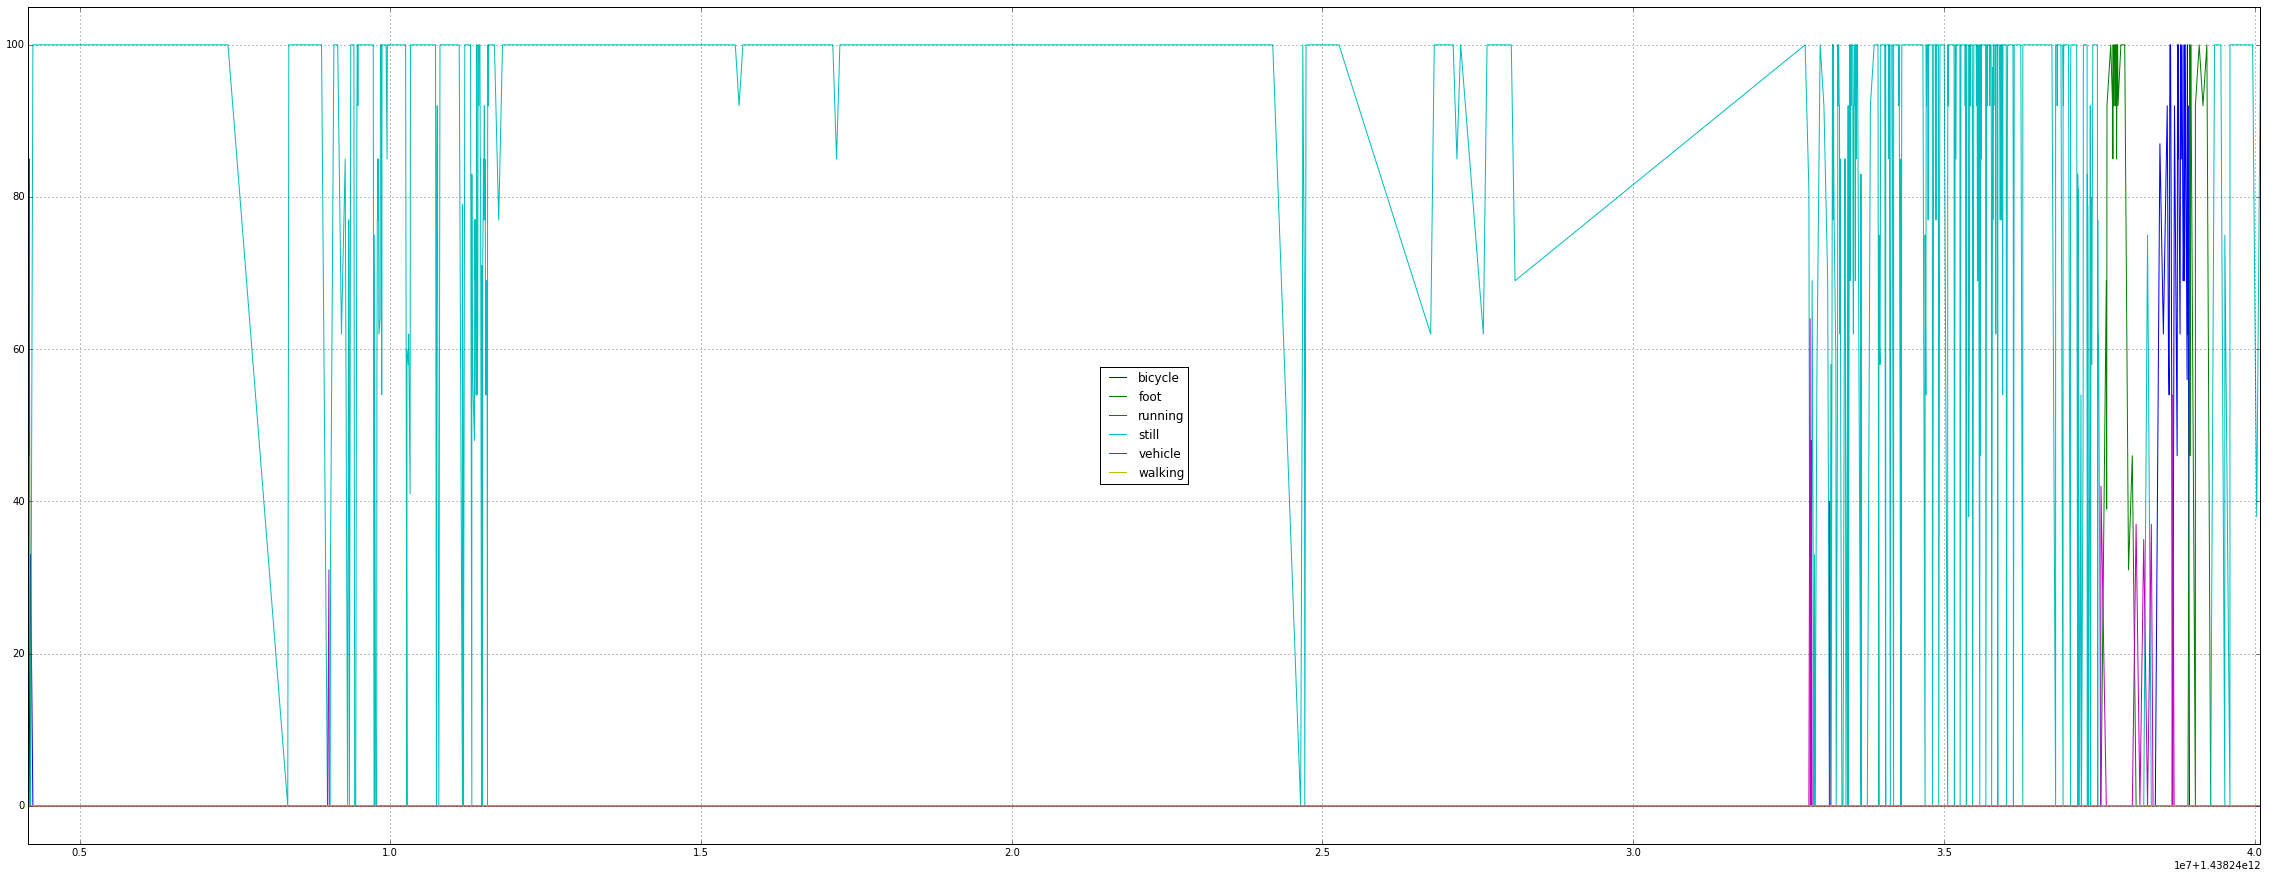

In [3]:
#types = [ 'vehicle', 'bicycle', 'foot', 'running', 'still', 'tilting', 'unknown', 'walking' ]
types = [ 'vehicle', 'bicycle', 'foot', 'running', 'still', 'walking' ]
curves = dict( (type, dict()) for type in types )

events_oldformat = filter(lambda e: 'type' in e, events)
for event in events_oldformat:
    dt = event['timestamp']
    for type in types:
        curves[type][dt] = event.get('confidence', 0) if type == event.get('type') else 0

ts = DataFrame(curves)
ts.plot(kind='line', figsize=(40,15), ylim=(-5,105))

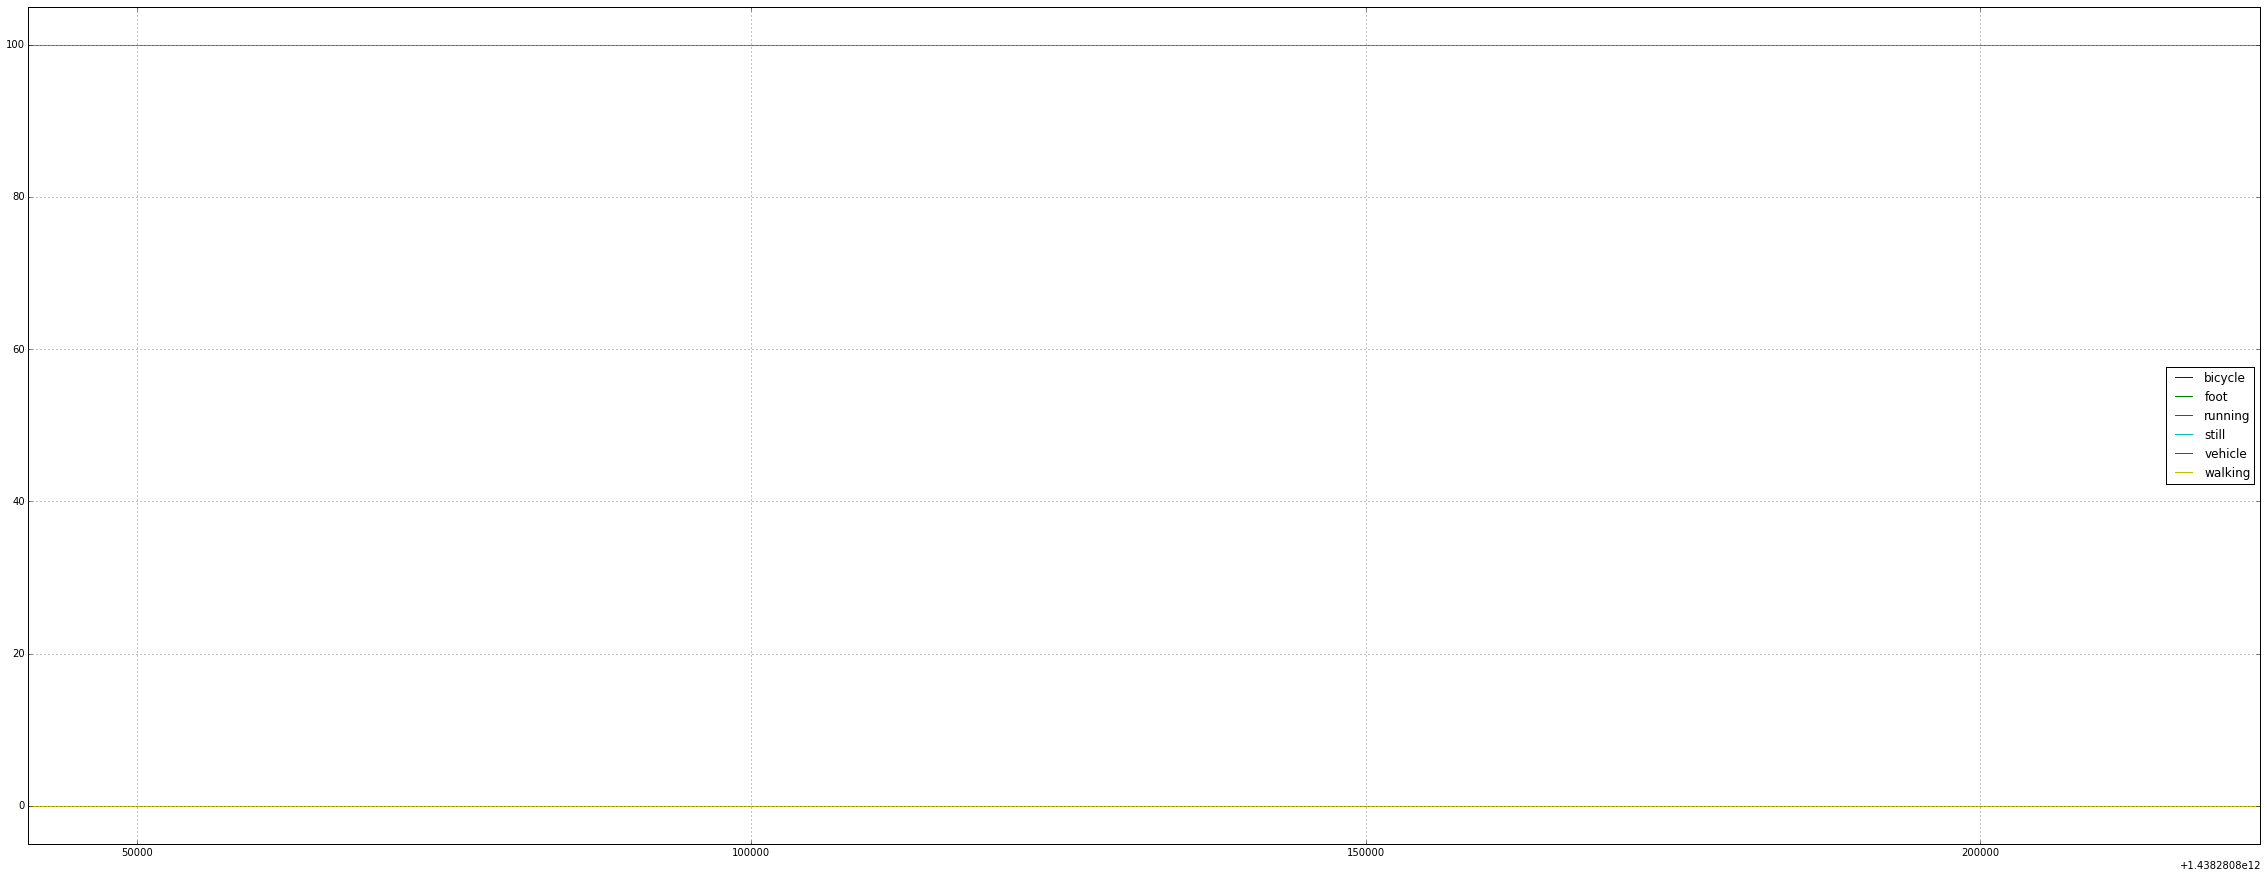

In [4]:
#types = [ 'vehicle', 'bicycle', 'foot', 'running', 'still', 'tilting', 'unknown', 'walking' ]
types = [ 'vehicle', 'bicycle', 'foot', 'running', 'still', 'walking' ]
curves = dict( (type, dict()) for type in types )

events_newformat = filter(lambda e: not 'type' in e, events)
for event in events_newformat:
    dt = event['timestamp']
    for type in types:
        curves[type][dt] = event.get(type, 0)

ts = DataFrame(curves)
ts.plot(kind='line', figsize=(40,15), ylim=(-5,105))